**Dataset:** This lab will use a dataset that represents water flow out of a dame versus change of water level. The dataset is uploaded in iLearn. You need to upload it to your Google Colab. 

**Step-1: Import Libraries:** The first step in any project is to import the libraries we are going to use

In [377]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import linear_model

#set default figure size
mpl.rcParams['figure.figsize'] = (12, 8)

**Step-2: Load the Data:** The next step is to load the data. While loading the data, let's also insert a column of ones to be the first column in the feature set. This column represents $X_0=1$, which will be multiplied by $\theta_0$.

In [378]:
data = pd.read_csv('Lab2_dataset.csv')
data_train = data.loc[0:11,['X', 'y']]
data_test = data.loc[0:20,['Xtest', 'ytest']]
data_val = data.loc[0:20,['Xval', 'yval']]

# Include a column of 1s in X to represent X_0 that will be multiplied by theta_0
X_train = np.c_[np.ones_like(data_train['X']), data_train['X']]
y_train = np.c_[data_train['y']]

X_val = np.c_[np.ones_like(data_val['Xval']), data_val['Xval']]
y_val = np.c_[data_val['yval']]

X_test = np.c_[np.ones_like(data_test['Xtest']), data_test['Xtest']]
y_test = np.c_[data_test['ytest']]

*Explore the data:* Let's look at the data: 

In [379]:
print('X_train:') 
print(X_train)
print('y_train:')
print(y_train)

X_train:
[[  1.     -15.9368]
 [  1.     -29.153 ]
 [  1.      36.1895]
 [  1.      37.4922]
 [  1.     -48.0588]
 [  1.      -8.9415]
 [  1.      15.3078]
 [  1.     -34.7063]
 [  1.       1.3892]
 [  1.     -44.3838]
 [  1.       7.0135]
 [  1.      22.7627]]
y_train:
[[ 2.1343]
 [ 1.1733]
 [34.3591]
 [36.838 ]
 [ 2.809 ]
 [ 2.1211]
 [14.7103]
 [ 2.6142]
 [ 3.7402]
 [ 3.7317]
 [ 7.6277]
 [22.7524]]


*Plot the data:* It is often useful to create a scatter plot of your data. Sometimes this helps identify the best polynomial order that fits your data. For that, we will create a function that we can use to plot our data. Here, we will create a general plot function that we can use to plot the data and later when we find the optimal model, we can also use the function to plot the optimal model on the same Figure with that data. The if condition in this function is intended to help us later when we try to plot the developed linear regression model on the scatter plot of the training data. Note here: once we know our model  $\theta_0 + \theta_1 X_1$, we will substitute by a rane of $X$  to find our line and plot it on the data. 

In [380]:
def plotData(X, y, theta = np.array(([0],[0])), reg = 0):
    plt.figure(figsize=(12, 8))
    plt.scatter(X[:, 1], y, s = 50, c = 'red', marker = 'x', linewidths = 1, label = 'Data')
    plt.grid(True)
    plt.title('Water Flow Data')
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam (y)')
    if theta.any() != 0:
        plt.plot(np.linspace(X.min(), X.max()), theta[0] + theta[1] * np.linspace(X.min(), X.max()), 
                                                 label = 'Optimized linear fit')
        plt.title('Water Data: Linear Fit')
        
    plt.legend()

Now, let's use the plot function: 

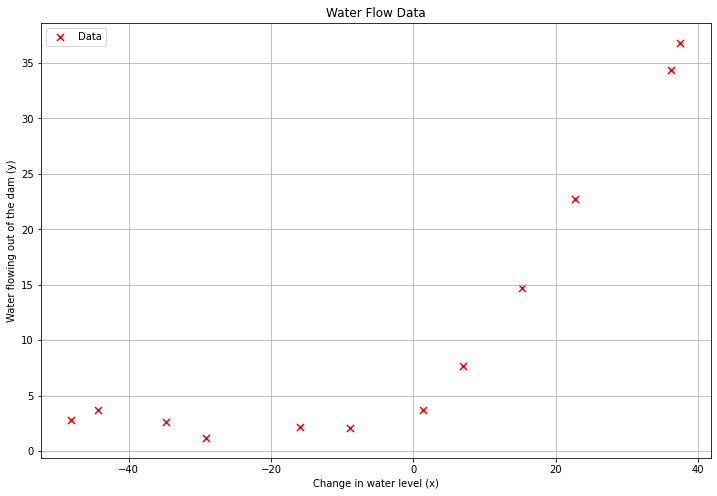

In [381]:
plotData(X_train, y_train)

**Step-3: Implement a Linear Regression Model:** 

*Step-3.1: Cost Function and Gradient:* Let's implement a function to calculate the cost $J$. This will be useful later in most of our next steps. This function will return the cost value. This is a general implementation that works even for regularized functions.

In [382]:
def cost(theta, X, y, reg = 0):
    m = y.size
    f = np.dot(X,theta).reshape((m, 1))
    J1 = (1 / (2 * m)) * np.sum(np.square(f - y))
    J2 = (reg / (2 * m)) * theta[1:].T.dot(theta[1:])
    J = J1 + J2
    grad = ((1 / m)*(X.T.dot(f - y)) + (reg / m) * np.r_[[[0]], theta[1:].reshape(-1, 1)]).ravel() 
    return J, grad

*Step-3.2: Gradient Descent Algorithm:* Next, we implement the iterations of the gradient descent.  

In [383]:
def gradient_descent(alpha, x, y, numIterations):
    m = y.size 
    theta = np.ones(2)
    J, grad = cost(theta, x, y, reg = 0)
    previous_J = J + 1  
    iter = 0
    J_hist = []
    while abs(J - previous_J) > 1e-3 and iter < numIterations:
        previous_J = J
        theta = theta - alpha * grad
        J, grad = cost(theta, x, y, reg = 0)
        J_hist.append(J)
        print(iter, J)
        iter += 1
    plt.plot(range(len(J_hist)), J_hist)
    plt.xlabel('Iteration')
    plt.ylabel('Mean Square Error (J)')
    plt.title('Mean Square Error versus Iteration Number') 
    plt.show()
    return theta


Let's use the gradient descent function to get $\theta$: 

0 1483678.591102604
1 10441755606.062258
2 73490408080396.95
3 5.1723487117430534e+17
4 3.640365034662035e+21
5 2.562135371016774e+25
6 1.8032635729962463e+29
7 1.269159916560044e+33
8 8.932509467411347e+36
9 6.286814162998229e+40
10 4.4247400424563134e+44
11 3.1141885119726924e+48
12 2.1918056190977795e+52
13 1.5426207673168392e+56
14 1.0857161835075267e+60
15 7.641409062451963e+63
16 5.3781212205093896e+67
17 3.785190352473064e+71
18 2.6640652780039266e+75
19 1.875003142399203e+79
20 1.3196511410715154e+83
21 9.287873149391114e+86
22 6.536923657652148e+90
23 4.600770296779267e+94
24 3.2380808515253353e+98
25 2.279002628832634e+102
26 1.6039911356072008e+106
27 1.1289094319405534e+110
28 7.9454086573982e+113
29 5.59208001518253e+117
30 3.9357772827815687e+121
31 2.770050281398531e+125
32 1.949596740406293e+129
33 1.372151067338693e+133
34 9.657374330685137e+136
35 6.796983304751185e+140
36 4.783803595380444e+144
37 3.366902023016311e+148
38 2.369668613389175e+152
39 1.6678030126493441

<ipython-input-382-84d1330b09d0>:4: RuntimeWarning: overflow encountered in square
  J1 = (1 / (2 * m)) * np.sum(np.square(f - y))
<ipython-input-382-84d1330b09d0>:5: RuntimeWarning: invalid value encountered in double_scalars
  J2 = (reg / (2 * m)) * theta[1:].T.dot(theta[1:])


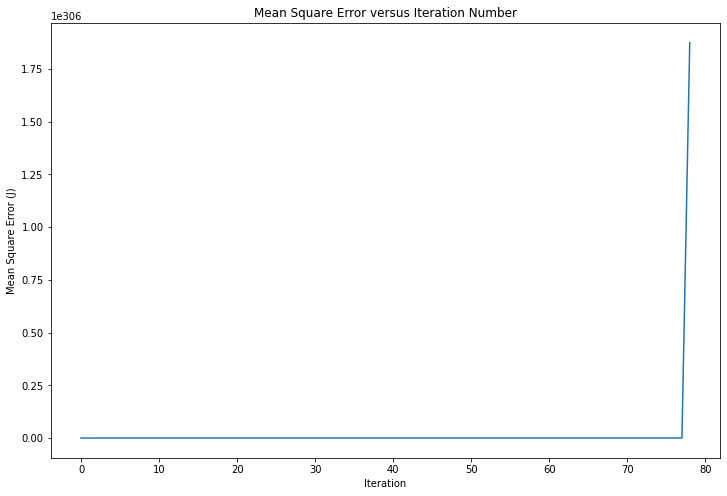

In [384]:
alpha = 0.1 # learning rate
theta = gradient_descent(alpha, X_train, y_train, 10000)


0 97.83089178216704
1 92.99331842560191
2 92.7493951937704
3 92.61056007053415
4 92.47438139171504
5 92.33852111647849
6 92.20292539000083
7 92.06759248465946
8 91.93252186336616
9 91.7977130171658
10 91.6631654387079
11 91.5288786216394
12 91.39485206058879
13 91.26108525116412
14 91.12757768995093
15 90.99432887451044
16 90.8613383033776
17 90.72860547605922
18 90.5961298930321
19 90.46391105574122
20 90.33194846659768
21 90.20024162897698
22 90.06879004721716
23 89.9375932266168
24 89.8066506734333
25 89.67596189488094
26 89.54552639912905
27 89.41534369530015
28 89.28541329346815
29 89.15573470465638
30 89.02630744083595
31 88.89713101492373
32 88.76820494078058
33 88.63952873320956
34 88.51110190795404
35 88.38292398169597
36 88.25499447205391
37 88.12731289758138
38 87.99987877776493
39 87.8726916330224
40 87.74575098470109
41 87.61905635507588
42 87.49260726734764
43 87.36640324564122
44 87.24044381500376
45 87.11472850140292
46 86.98925683172502
47 86.86402833377329
48 86.73904

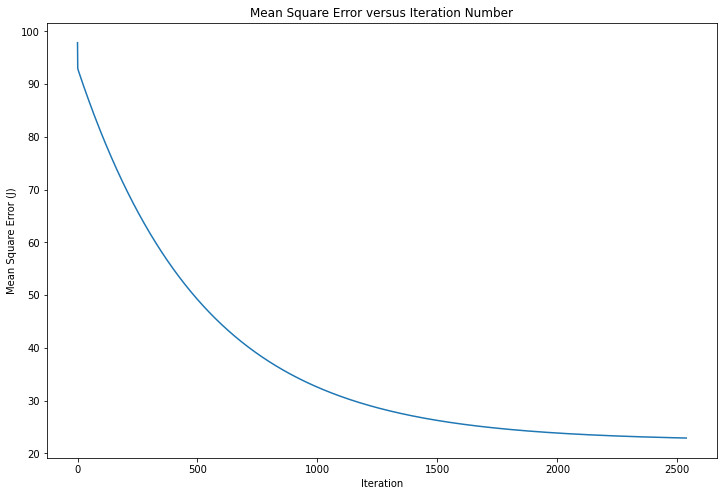

In [385]:
alpha = 0.001
theta = gradient_descent(alpha, X_train, y_train, 10000)


Streaming output truncated to the last 5000 lines.
5000 49.21375703593129
5001 49.208553037236896
5002 49.203350047549335
5003 49.19814806667296
5004 49.192947094412155
5005 49.18774713057139
5006 49.182548174955116
5007 49.17735022736787
5008 49.172153287614165
5009 49.16695735549863
5010 49.16176243082589
5011 49.15656851340058
5012 49.15137560302743
5013 49.1461836995112
5014 49.14099280265664
5015 49.135802912268566
5016 49.13061402815184
5017 49.12542615011137
5018 49.12023927795207
5019 49.11505341147891
5020 49.10986855049692
5021 49.1046846948111
5022 49.09950184422659
5023 49.09431999854846
5024 49.08913915758189
5025 49.08395932113206
5026 49.078780489004245
5027 49.07360266100367
5028 49.06842583693566
5029 49.063250016605565
5030 49.05807519981878
5031 49.0529013863807
5032 49.04772857609681
5033 49.04255676877259
5034 49.03738596421358
5035 49.03221616222537
5036 49.027047362613544
5037 49.02187956518379
5038 49.01671276974174
5039 49.01154697609317
5040 49.0063821840438
5

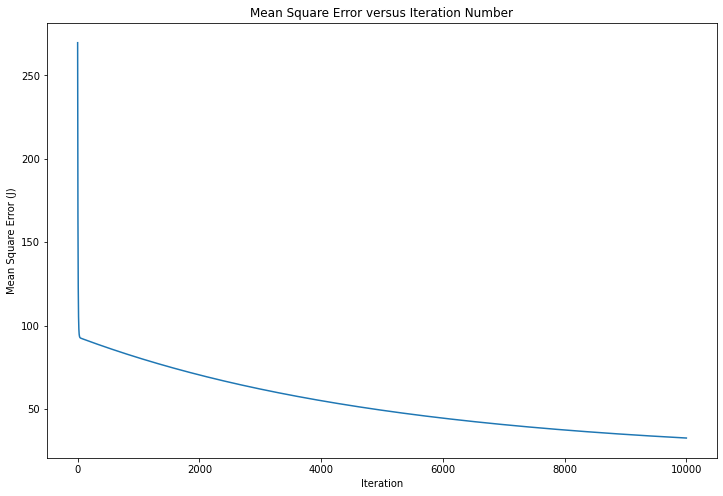

In [386]:
alpha = 0.0001 # learning rate
theta = gradient_descent(alpha, X_train, y_train, 10000)

#Report of step size
Here, I plotted Mean Square Error (J) versus iteration for alpha = 0.1, 0.001, and 0.0001. The best alpha value should be the one to have the fastest convergence of the cost function with few iterations. 

When alpha = 0.1, there were only about 79 iterations, but our MSE doesn't converge. So it is not good. 

When alpha = 0.0001, it takes way too many iterations for the value to converge. 

When alpha = 0.001, the value converges much faster at around 2500 iterations. 

So the alpha value of 0.001 represents the best step size in my case.

*Step-3.3: Plot the Data and the Model:* Now, Let's plot the linear regression model on our training data

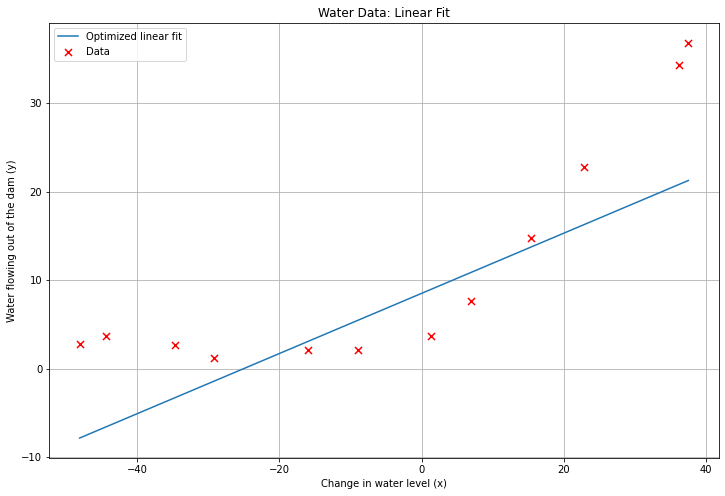

In [387]:
plotData(X_train, y_train, theta)

**Another Way to Find the Model Parameters:** In Step-3.2 (as in the lecture), we found the model parameters $\theta$ using Gradient Descent Algorithm. Here, we will try another way to find the model parameters. Remember that finding the model parameters requires solving $\min_{\theta} J$. There are built-in functions in python that can solve minimization problems (instead of using Gradient Descent). We will try this here. 

In [388]:
from scipy.optimize import minimize
def optimalTheta(theta, X, y, reg = 0):
    #Nelder-Mead yields best fit
    res = minimize(fun = cost, x0 = theta, args = (X, y, reg), method = 'Nelder-Mead', jac = True)
    return res.x

Then, we use our new function to find $\theta$

In [389]:
initial_theta = np.ones((X_train.shape[1], 1))
opt_theta = optimalTheta(initial_theta, X_train, y_train)
print("Optimized theta: {0}".format(opt_theta))

Optimized theta: [13.0879157   0.36777795]


/usr/local/lib/python3.8/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


And we plot our model

*Note that this result is identical to the one we got using the Gradient Descent method. Both technqiues minimize the cost function to find $\theta$. 

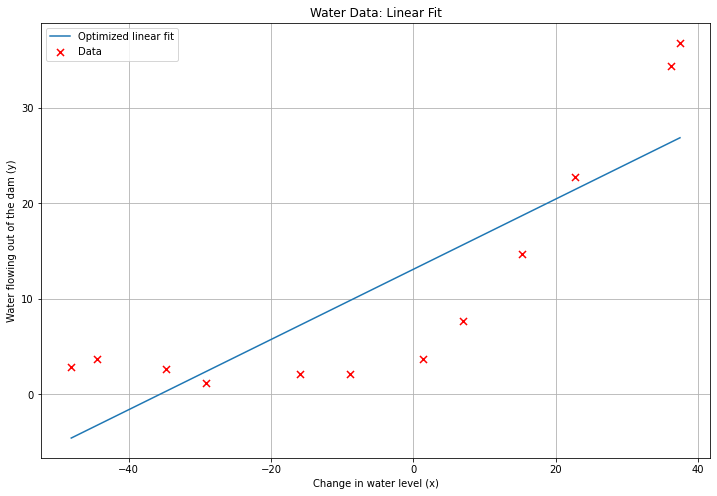

In [390]:
plotData(X_train, y_train, opt_theta)

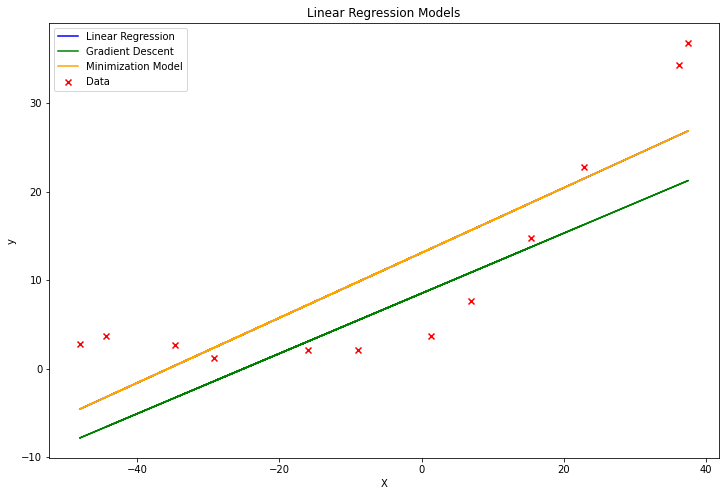

In [391]:
#Train our linear regression model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

theta_lr = np.array([regr.intercept_[0], regr.coef_[0][1]])

# Calculate the predicted values for the model obtained using LinearRegression
y_pred_lr = theta_lr[0] + theta_lr[1] * X_train[:,1]
y_pred_gd = theta[0] + theta[1] * X_train[:,1]
y_pred_opt = opt_theta[0] + opt_theta[1] * X_train[:,1]

# Plot the data and all 3 the models in the same figure
plt.scatter(X_train[:,1], y_train, color = 'red', marker = 'x', label = 'Data')
plt.plot(X_train[:,1], y_pred_lr, color = 'blue', label = 'Linear Regression')
plt.plot(X_train[:,1], y_pred_gd, color = 'green', label = 'Gradient Descent')
plt.plot(X_train[:,1], y_pred_opt, color = 'orange', label = 'Minimization Model')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Models')
plt.legend()
plt.show()

#Report of Linear Regression Model
The Linear Regression and Minimization Model lies on the same line. It means that the optimization has converged to a global optimum. This is considered a good result because it indicates that our optimization method has found the best fit line of the data. Hence, our linear regression model is good.

*Step-3.4: Learning Curves:* Let's implement a function to plot the learning curves. We will do a for loop on the number of training examples. Each time, we will find the optimal $\theta$ values using the current set of train data, calculate the cost function (error) on train and validation data, and save the train and validation errors in arrays to plot them.  

In [392]:
def plotLearningCurve(theta, X, y, Xval, yval, reg = 0):
    m = y.size
    
    error_train = np.zeros((m, 1))
    error_val = np.zeros((m, 1))
    
    example_num = np.arange(1, (X.shape[0] + 1))
    for i in np.arange(m):
        
        opt_theta = optimalTheta(theta, X[:i + 1], y[:i + 1], reg)
        error_train[i] = cost(opt_theta, X[:i + 1], y[:i + 1], reg)[0]
        error_val[i] = cost(opt_theta, Xval, yval, reg)[0]
    
    plt.figure(figsize = (12, 8))
    plt.plot(example_num, error_train, label = 'Training Error')
    plt.plot(example_num, error_val, label = 'Validation Error')
    plt.title('Learning Curve: No Regularization')
    if reg != 0:
        plt.title('Learning Curve: Lambda = {0}'.format(reg))
    plt.xlabel('Number of training examples')
    plt.ylabel('Mean Square Error')
    plt.legend()
    plt.grid(True)

Now, let's plot the learning curves

/usr/local/lib/python3.8/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


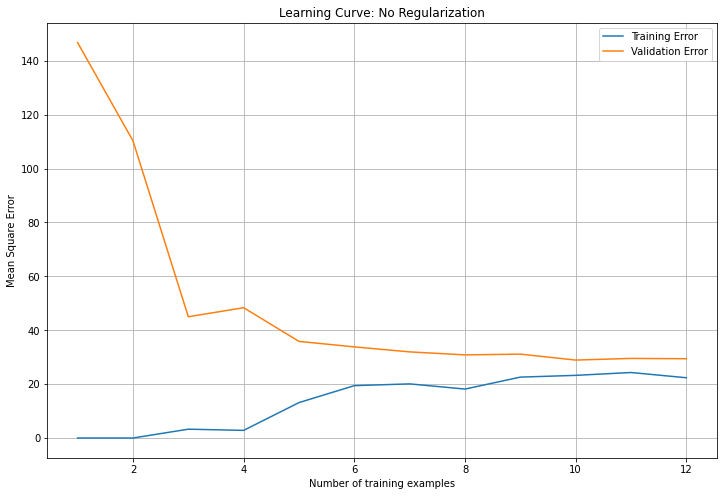

In [393]:
initial_theta = np.ones((X_train.shape[1], 1))
plotLearningCurve(initial_theta, X_train, y_train, X_val, y_val)

Implementation of Question 3)

/usr/local/lib/python3.8/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


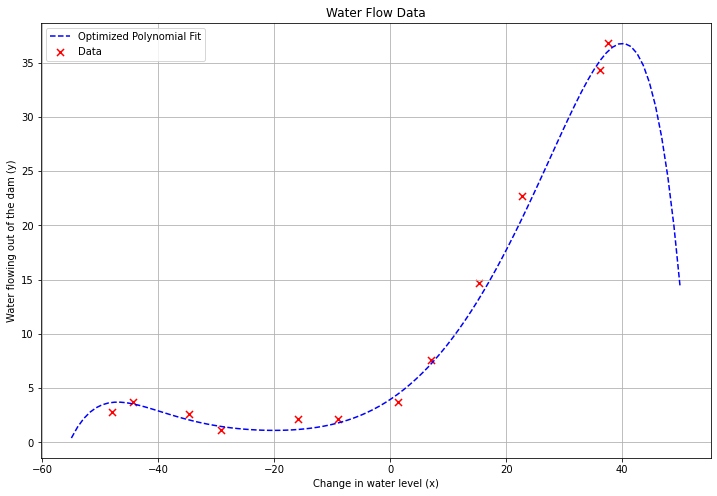

In [394]:
def create_higher_order_features(X_higher_order, p):
    # create higher order features
    for i in np.arange(p):
        dimension = i + 2
        X_higher_order = np.insert(X_higher_order, X_higher_order.shape[1], np.power(X_higher_order[:,1], dimension), axis = 1)
    # perform normalization feature normalization
    normalized_X = X_higher_order
    mean = np.mean(normalized_X, axis = 0)
    normalized_X[:,1:] = normalized_X[:,1:] - mean[1:]
    standard_deviation = np.std(normalized_X, axis = 0)
    normalized_X[:,1:] = normalized_X[:,1:] / standard_deviation[1:]
    
    return X_higher_order, normalized_X

#Polynomial Regression function that creates higher order features, scale them and find optimal theta
def polynomial_regression(X, y, degree, num_points, reg = 0):
    X_higher_order = create_higher_order_features(X, degree)[1]
    init_theta = np.ones((X_higher_order.shape[1], 1))
    opt_theta = optimalTheta(init_theta, X_higher_order, y, reg)
    range = np.linspace(-55,50, num_points)
    range_polynomial = np.ones((num_points, 1))
    range_polynomial = np.insert(range_polynomial, range_polynomial.shape[1], range.T, axis = 1)
    range_polynomial = create_higher_order_features(range_polynomial, len(init_theta)-2)[0]
    range_y = range_polynomial @ opt_theta
    plotData(X, y)
    plt.plot(range, range_y, color="blue", linestyle="--", label = 'Optimized Polynomial Fit')
    plt.grid(True)
    if reg != 0:
        plt.title('Polynomial Fit: Regularization of {0}'.format(reg))    
    plt.title('Water Flow Data')
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam (y)')
    plt.legend()
  
polynomial_regression(X_train, y_train, 8, 100)


In [395]:
Xpolynomial = create_higher_order_features(X_train, 8)[1]
Xpolyval = create_higher_order_features(X_val, 8)[0]
initial_theta = np.ones((Xpolynomial.shape[1], 1))

This is the learning curve of the polynomial regression with regularization of 0.

/usr/local/lib/python3.8/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


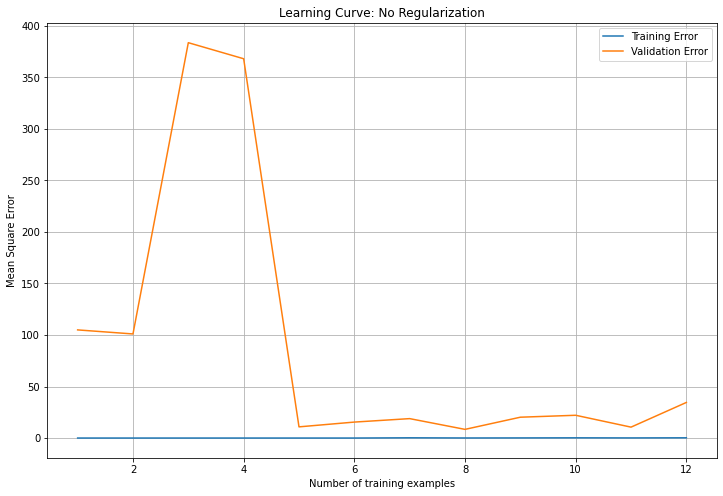

In [396]:
plotLearningCurve(initial_theta, Xpolynomial, y_train, Xpolyval, y_val, 0)

This is the learning curve of the polynomial regression with regularization of 1.

/usr/local/lib/python3.8/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


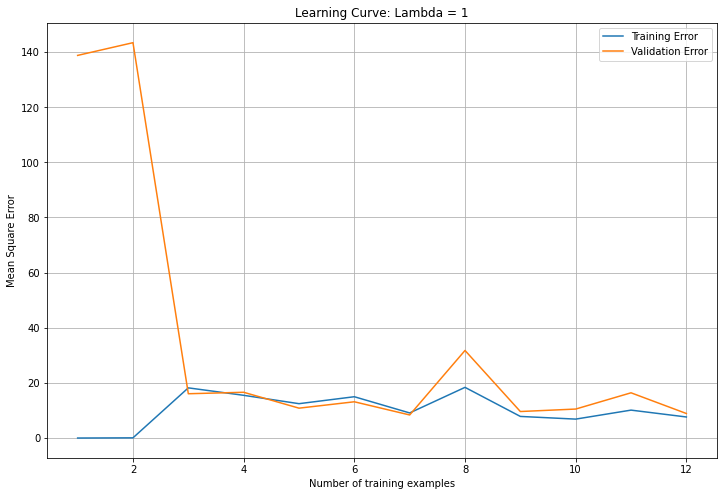

In [397]:
plotLearningCurve(initial_theta, Xpolynomial, y_train, Xpolyval, y_val, 1)

This is the learning curve of the polynomial regression with regularization of 100.

/usr/local/lib/python3.8/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


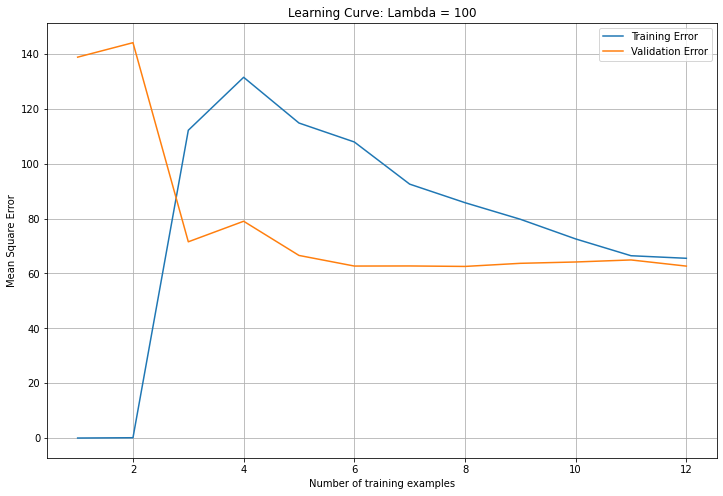

In [398]:
plotLearningCurve(initial_theta, Xpolynomial, y_train, Xpolyval, y_val, 100)

# Report of Learning Curve: 
When the regularization is 0, the training error is low and validation error is high. That indicates that there is an overfitting which means that the data is trained too well and is not generalizing well to unseen data.

When the regularization is 100, the training error is high and validation error is low. This means that there is underfitting. The model is too simple to determine the relationships in the training data. So we need to increase the model complexity.

Hence, the best model of the learning curve is the one with regularization of 1. It shows that the training error and validation error are both low and close to each other. That indicates a good fit of the model to the training data.